"""

@Author: Girish</br>
@Date: 2024-10-04</br>
@Last Modified by: Girish</br>
@Last Modified time: 2024-10-04</br>
@Title:Classification using logistic regression</br>

"""

Based on bank customer data, predicted whether cutomer will subscribe to
term deposit or not.


        Importing required modules

In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

        Reading Dataset

In [64]:
df = pd.read_csv("bank.csv",sep= ';')
df


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


        Discriptive Statistics of Dataset

In [65]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


        Check for Null Values

In [66]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

        Outliers Handling

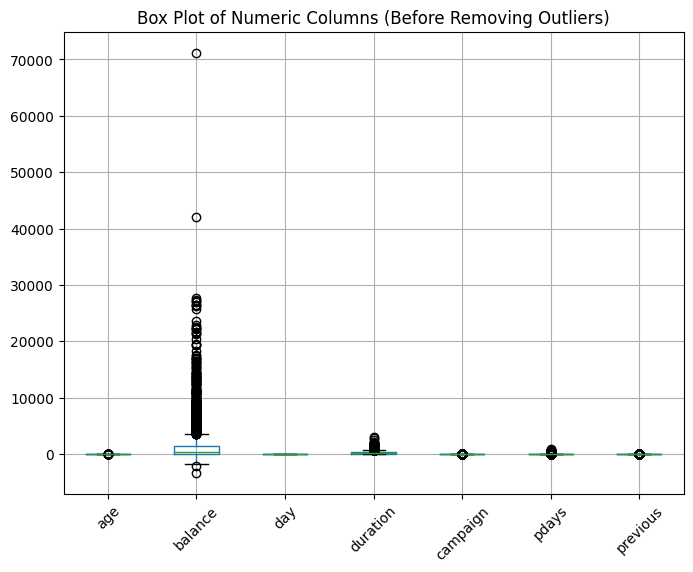

In [67]:
numeric_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays','previous']

# Initial box plot to visualize outliers
plt.figure(figsize=(8, 6))
df[numeric_columns].boxplot()
plt.title('Box Plot of Numeric Columns (Before Removing Outliers)')
plt.xticks(rotation=45)
plt.show()


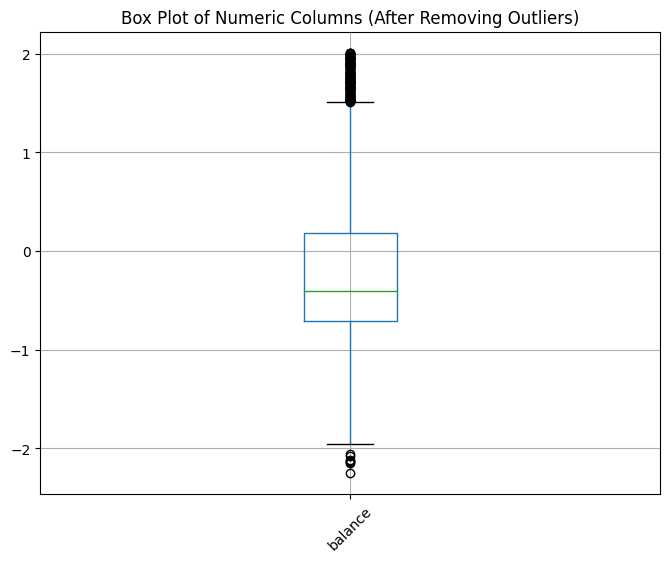

In [89]:
numeric_columns = ['balance']
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1


df = df[~((df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]
plt.figure(figsize=(8,6))
df[numeric_columns].boxplot()
plt.title('Box Plot of Numeric Columns (After Removing Outliers)')
plt.xticks(rotation=45)
plt.show()

        Label Encoding

In [90]:
label_encoder = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
     df.loc[:, column] = label_encoder.fit_transform(df.loc[:, column])
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,-1.048600,1.701579,-0.237445,-1.641343,-0.139242,1.296433,-1.160947,-0.432829,-0.720563,0.413955,1.488034,-0.719577,-0.852217,-0.413361,-0.325402,0.450874,0
2,-0.565850,-0.123445,1.416254,1.056052,-0.139242,0.796548,0.861366,-0.432829,-0.720563,0.050014,-1.860872,-0.318049,-0.852217,2.826567,0.275948,-2.540439,0
3,-1.048600,-0.123445,-0.237445,1.056052,-0.139242,0.940679,0.861366,2.310381,1.491494,-1.527063,0.148471,-0.265018,1.402444,-0.413361,-0.325402,0.450874,0
4,1.751347,-1.035956,-0.237445,-0.292645,-0.139242,-0.747722,0.861366,-0.432829,1.491494,-1.284436,0.818253,-0.162742,-0.852217,-0.413361,-0.325402,0.450874,0
5,-0.565850,-0.123445,1.416254,1.056052,-0.139242,0.106774,-1.160947,-0.432829,-0.720563,0.899209,-0.856200,-0.484721,-0.100664,1.319168,1.478648,-2.540439,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4514,-0.276200,-1.035956,-0.237445,-0.292645,-0.139242,0.630682,0.861366,-0.432829,-0.720563,0.535268,-1.860872,-0.848369,1.402444,1.094037,0.275948,-2.540439,0
4515,-0.855500,0.789067,1.416254,-0.292645,-0.139242,-0.206655,0.861366,-0.432829,-0.720563,-1.041808,-0.186419,1.344880,2.153998,-0.413361,-0.325402,0.450874,0
4516,-0.758950,0.789067,-0.237445,-0.292645,-0.139242,-1.128641,0.861366,-0.432829,-0.720563,1.748404,-0.186419,0.227422,2.153998,-0.413361,-0.325402,0.450874,0
4519,-1.241699,-1.035956,-0.237445,-0.292645,-0.139242,0.552896,-1.160947,-0.432829,-0.720563,-1.163122,-0.856200,-0.530177,1.402444,1.661759,1.478648,-1.543335,0


        Feature Scaling

In [91]:
scaler=StandardScaler()
numeric_columns = ['age','job','marital','education','default','balance','housing','loan','contact','day','month','duration','campaign','pdays','previous','poutcome']
df.loc[:, numeric_columns] = scaler.fit_transform(df.loc[:, numeric_columns])
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,-1.041100,1.699364,-0.231312,-1.644268,-0.143171,2.042470,-1.172858,-0.439414,-0.719542,0.417624,1.495627,-0.723548,-0.849158,-0.416687,-0.330940,0.453612,0
2,-0.558173,-0.121850,1.417200,1.067646,-0.143171,1.352958,0.852618,-0.439414,-0.719542,0.054646,-1.865386,-0.318852,-0.849158,2.792891,0.276074,-2.523481,0
3,-1.041100,-0.121850,-0.231312,1.067646,-0.143171,1.551764,0.852618,2.275759,1.492725,-1.518258,0.151221,-0.265402,1.409862,-0.416687,-0.330940,0.453612,0
4,1.759879,-1.032457,-0.231312,-0.288311,-0.143171,-0.777115,0.852618,-0.439414,1.492725,-1.276273,0.823424,-0.162320,-0.849158,-0.416687,-0.330940,0.453612,0
5,-0.558173,-0.121850,1.417200,1.067646,-0.143171,0.401525,-1.172858,-0.439414,-0.719542,0.901595,-0.857082,-0.486839,-0.096151,1.299613,1.490102,-2.523481,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4514,-0.268416,-1.032457,-0.231312,-0.288311,-0.143171,1.124172,0.852618,-0.439414,-0.719542,0.538617,-1.865386,-0.853355,1.409862,1.076591,0.276074,-2.523481,0
4515,-0.847929,0.788757,1.417200,-0.288311,-0.143171,-0.030801,0.852618,-0.439414,-0.719542,-1.034288,-0.184880,1.357196,2.162869,-0.416687,-0.330940,0.453612,0
4516,-0.751344,0.788757,-0.231312,-0.288311,-0.143171,-1.302533,0.852618,-0.439414,-0.719542,1.748543,-0.184880,0.230922,2.162869,-0.416687,-0.330940,0.453612,0
4519,-1.234271,-1.032457,-0.231312,-0.288311,-0.143171,1.016879,-1.172858,-0.439414,-0.719542,-1.155280,-0.857082,-0.532654,1.409862,1.638994,1.490102,-1.531117,0


        Correlation Heat map

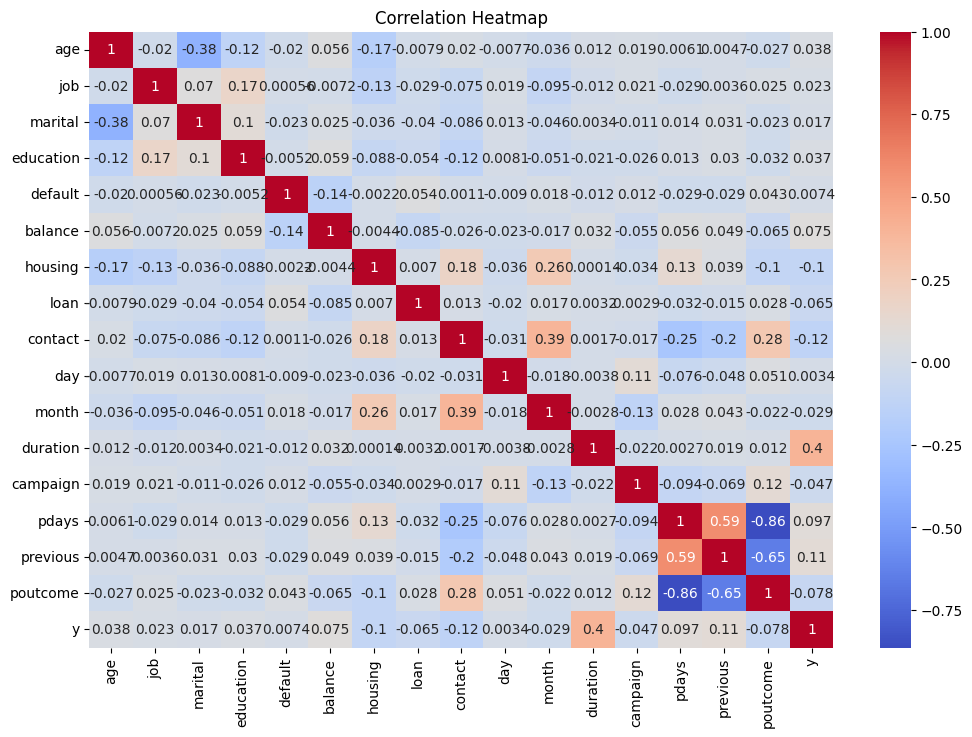

In [92]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

        Splitting the Data into Features and Target

In [93]:
X = df.drop('y', axis=1)
y = df['y']

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        Training the model

In [95]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [96]:
# Make predictions on the test set
y_pred = model.predict(X_test)
print(y_pred)

[0 0 0 ... 1 0 0]


        Confusion Matrix

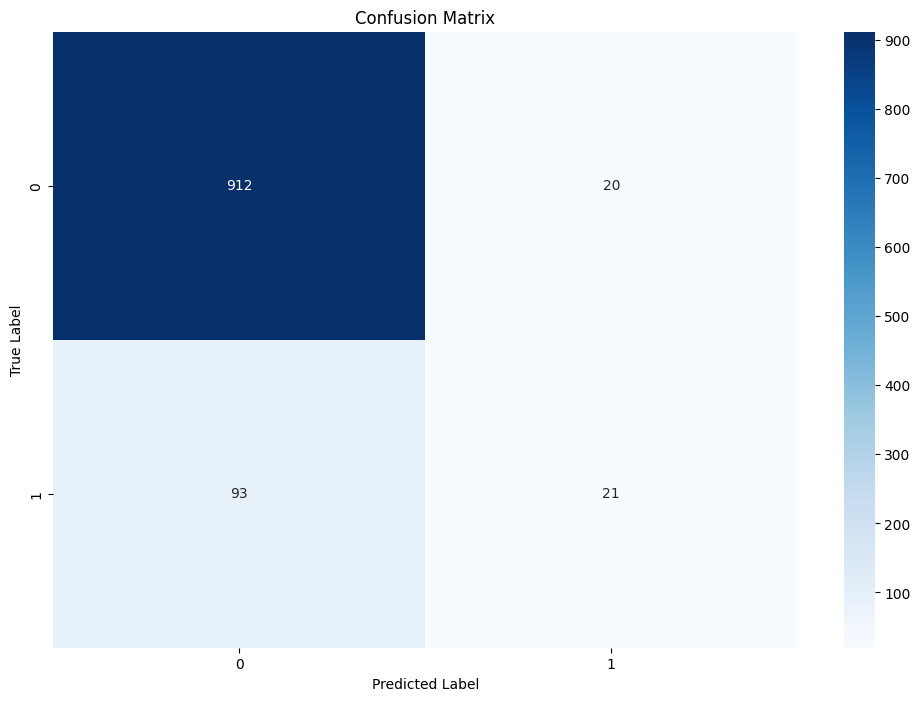

In [98]:

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=model.classes_, 
            yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [100]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       932
           1       0.51      0.18      0.27       114

    accuracy                           0.89      1046
   macro avg       0.71      0.58      0.61      1046
weighted avg       0.86      0.89      0.87      1046



        ROC curve

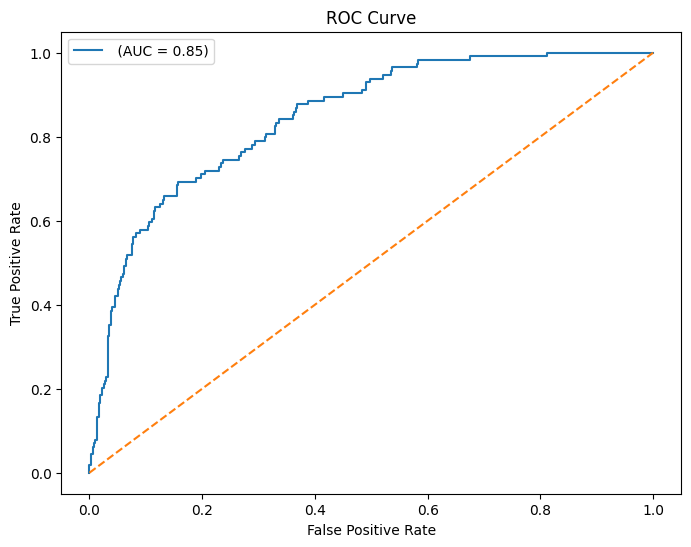

In [101]:
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f' (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()